In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "202505-capitalbikeshare-tripdata.csv"
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Display the first few rows of the dataset
print("\nFirst 5 Rows:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display the column names
print("\nColumn Names:")
print(data.columns)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691727 entries, 0 to 691726
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             691727 non-null  object 
 1   rideable_type       691727 non-null  object 
 2   started_at          691727 non-null  object 
 3   ended_at            691727 non-null  object 
 4   start_station_name  486285 non-null  object 
 5   start_station_id    486285 non-null  float64
 6   end_station_name    481237 non-null  object 
 7   end_station_id      481150 non-null  float64
 8   start_lat           691727 non-null  float64
 9   start_lng           691727 non-null  float64
 10  end_lat             691170 non-null  float64
 11  end_lng             691170 non-null  float64
 12  member_casual       691727 non-null  object 
dtypes: float64(6), object(7)
memory usage: 68.6+ MB
None

Summary Statistics:
       start_station_id  end_station_id      s

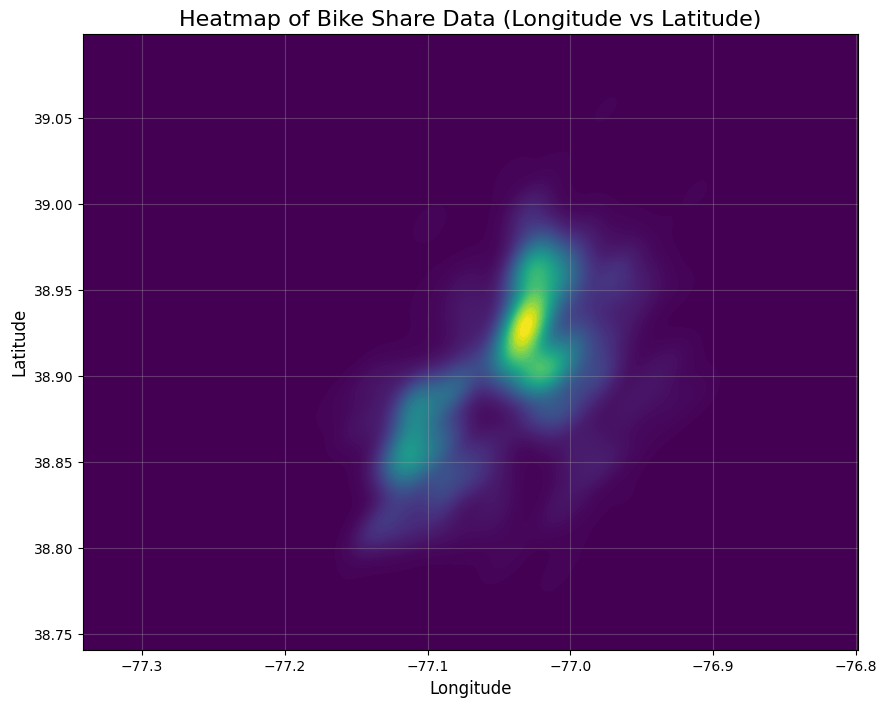

In [4]:
import seaborn as sns

# Filter data to include only relevant columns for the heatmap
heatmap_data = data.head(10000)[['start_lat', 'start_lng']]

# Create a 2D histogram (heatmap) of the latitude and longitude
plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=heatmap_data['start_lng'], 
    y=heatmap_data['start_lat'], 
    cmap="viridis", 
    fill=True, 
    thresh=0, 
    levels=100
)
plt.title('Heatmap of Bike Share Data (Longitude vs Latitude)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import folium
from folium.plugins import HeatMap

# Create a base map centered around the average latitude and longitude
center_lat = heatmap_data['start_lat'].mean()
center_lng = heatmap_data['start_lng'].mean()
base_map = folium.Map(location=[center_lat, center_lng], zoom_start=12)

# Add a heatmap layer to the map
heat_data = heatmap_data[['start_lat', 'start_lng']].values.tolist()
HeatMap(heat_data, radius=10).add_to(base_map)

# Display the map
base_map

In [45]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0CA4F620385C77DF,electric_bike,2025-05-24 10:39:59.913,2025-05-24 10:55:10.772,NaN,NaN,NaN,NaN,38.87,-77.30,38.87,-77.32,member
1,F68B5D6B37FD190B,electric_bike,2025-05-24 16:05:25.437,2025-05-24 16:21:17.901,NaN,NaN,NaN,NaN,38.85,-77.07,38.84,-77.07,member
2,1C72ACFB2510F1C4,electric_bike,2025-05-24 19:40:55.846,2025-05-24 19:53:46.440,NaN,NaN,NaN,NaN,38.84,-77.07,38.85,-77.07,member
3,96E6F2FDF0A3B3F2,electric_bike,2025-05-24 15:38:05.586,2025-05-24 15:40:25.676,NaN,NaN,NaN,NaN,38.84,-77.07,38.84,-77.08,member
4,D43C01B502E7D175,electric_bike,2025-05-24 15:41:01.849,2025-05-24 15:59:00.956,NaN,NaN,NaN,NaN,38.84,-77.08,38.85,-77.07,member


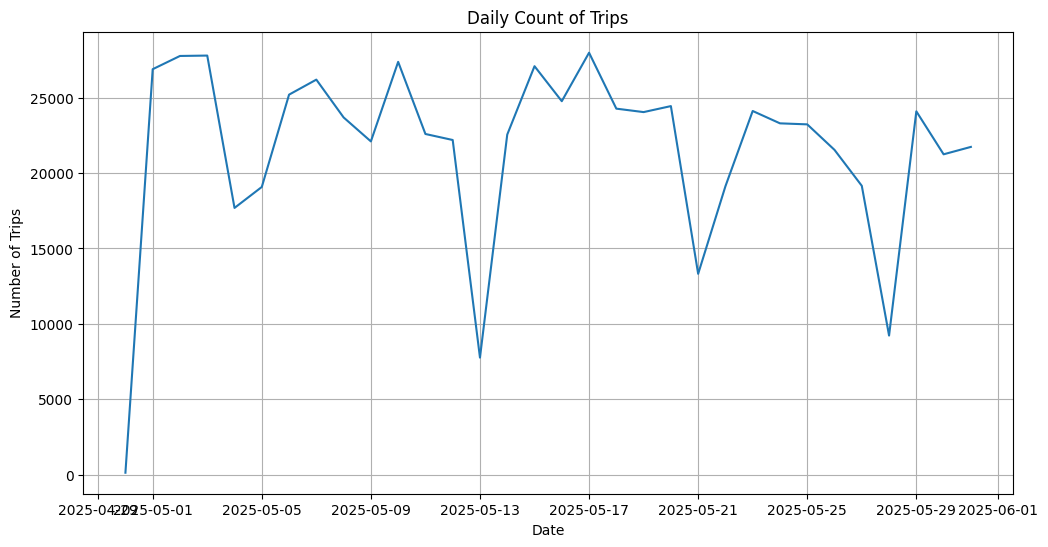

In [5]:
# Convert 'started_at' column to datetime
data['started_at'] = pd.to_datetime(data['started_at'])

# Extract the date part and count trips per day
daily_counts = data.groupby(data['started_at'].dt.date).size()

# Plot the daily count of trips
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', title='Daily Count of Trips', xlabel='Date', ylabel='Number of Trips')
plt.grid()
plt.show()

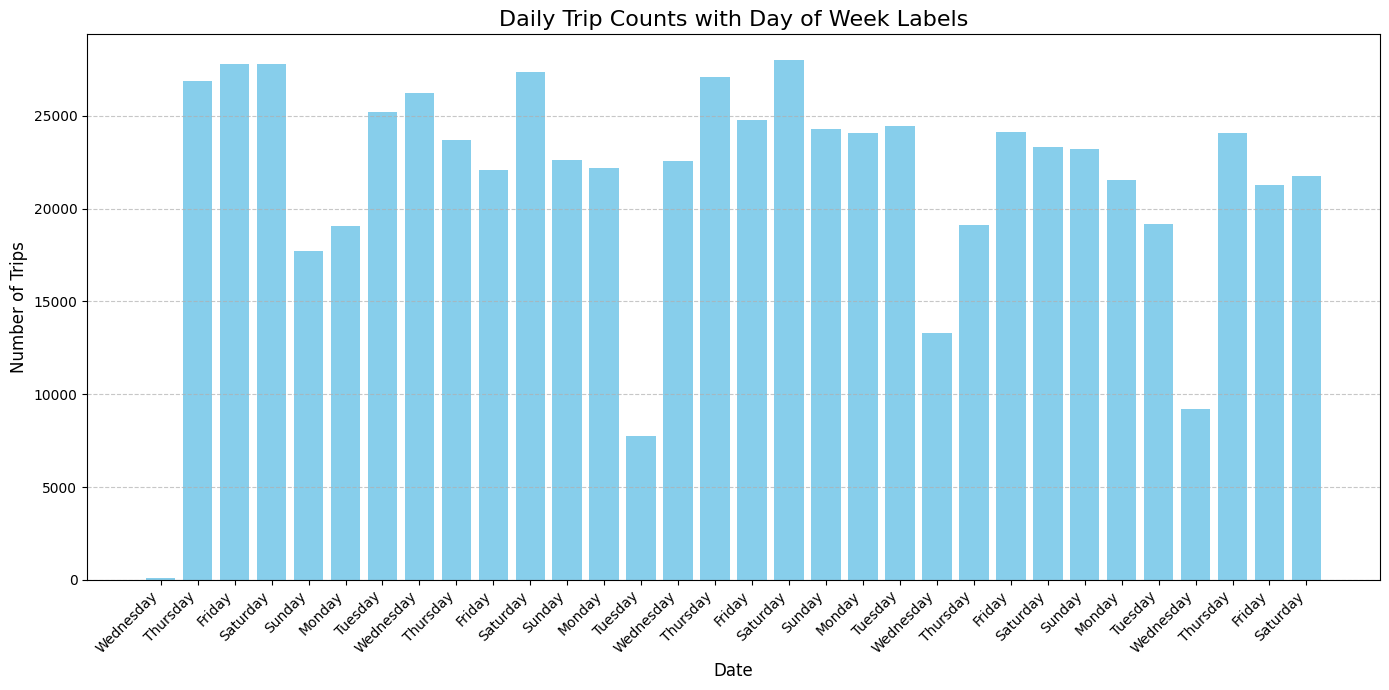

In [6]:
# Add day of the week to the daily_counts index
daily_counts.index = pd.to_datetime(daily_counts.index)
daily_counts_with_labels = daily_counts.rename_axis('Date').reset_index()
daily_counts_with_labels['DayOfWeek'] = daily_counts_with_labels['Date'].dt.day_name()

# Plot the daily count of trips with labels
plt.figure(figsize=(14, 7))
plt.bar(daily_counts_with_labels['Date'], daily_counts_with_labels[0], color='skyblue')
plt.title('Daily Trip Counts with Day of Week Labels', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(daily_counts_with_labels['Date'], labels=daily_counts_with_labels['DayOfWeek'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
from meteostat import Daily, Point
from datetime import datetime
import pandas as pd

# Define the location (Washington, DC) and date range
dc_location = Point(38.9072, -77.0369)  # Latitude and longitude for DC
start_date = datetime(2022, 1, 1)  # Start date (1 year ago)
end_date = datetime(2025, 6, 1)    # End date (today)

# Fetch daily weather data
data = Daily(dc_location, start_date, end_date)
data = data.fetch()

# Select relevant columns (date, temperature, and rainfall)
weather_summary = data[['tavg', 'prcp']].reset_index()
weather_summary.rename(columns={'time': 'Date', 'tavg': 'Average Temperature (°C)', 'prcp': 'Precipitation (mm)'}, inplace=True)

# Display the first few rows
print(weather_summary.head())

# Save to CSV for further analysis
weather_summary.to_csv('dc_weather_summary.csv', index=False)
print("Weather data saved to dc_weather_summary.csv")

        Date  Average Temperature (°C)  Precipitation (mm)
0 2022-01-01                      13.8                11.2
1 2022-01-02                      15.3                 3.3
2 2022-01-03                       3.2                25.1
3 2022-01-04                      -1.3                 0.0
4 2022-01-05                       1.2                 0.0
Weather data saved to dc_weather_summary.csv


In [21]:
# Load weather data from the CSV file
weather_data = pd.read_csv('dc_weather_summary.csv', parse_dates=['Date'])

# Merge the weather data with the bike share data on the 'Date' column
merged_data = pd.merge(daily_counts_with_labels, weather_data, on='Date', how='inner')

# Display the first few rows of the merged dataset
print(merged_data.head())

        Date      0  DayOfWeek  Average Temperature (°C)  Precipitation (mm)
0 2025-04-30    122  Wednesday                      24.7                 0.3
1 2025-05-01  26892   Thursday                      22.1                 0.0
2 2025-05-02  27770     Friday                      24.6                 0.0
3 2025-05-03  27796   Saturday                      23.9                 7.9
4 2025-05-04  17689     Sunday                      20.8                 5.6


In [22]:
merged_data

,Date,0,DayOfWeek,Average Temperature (°C),Precipitation (mm)
0,2025-04-30,122,Wednesday,24.7,0.3
1,2025-05-01,26892,Thursday,22.1,0.0
2,2025-05-02,27770,Friday,24.6,0.0
3,2025-05-03,27796,Saturday,23.9,7.9
4,2025-05-04,17689,Sunday,20.8,5.6
5,2025-05-05,19079,Monday,20.2,16.3
6,2025-05-06,25204,Tuesday,19.3,0.5
7,2025-05-07,26200,Wednesday,19.1,0.0
8,2025-05-08,23692,Thursday,20.1,0.8
9,2025-05-09,22102,Friday,16.9,25.1


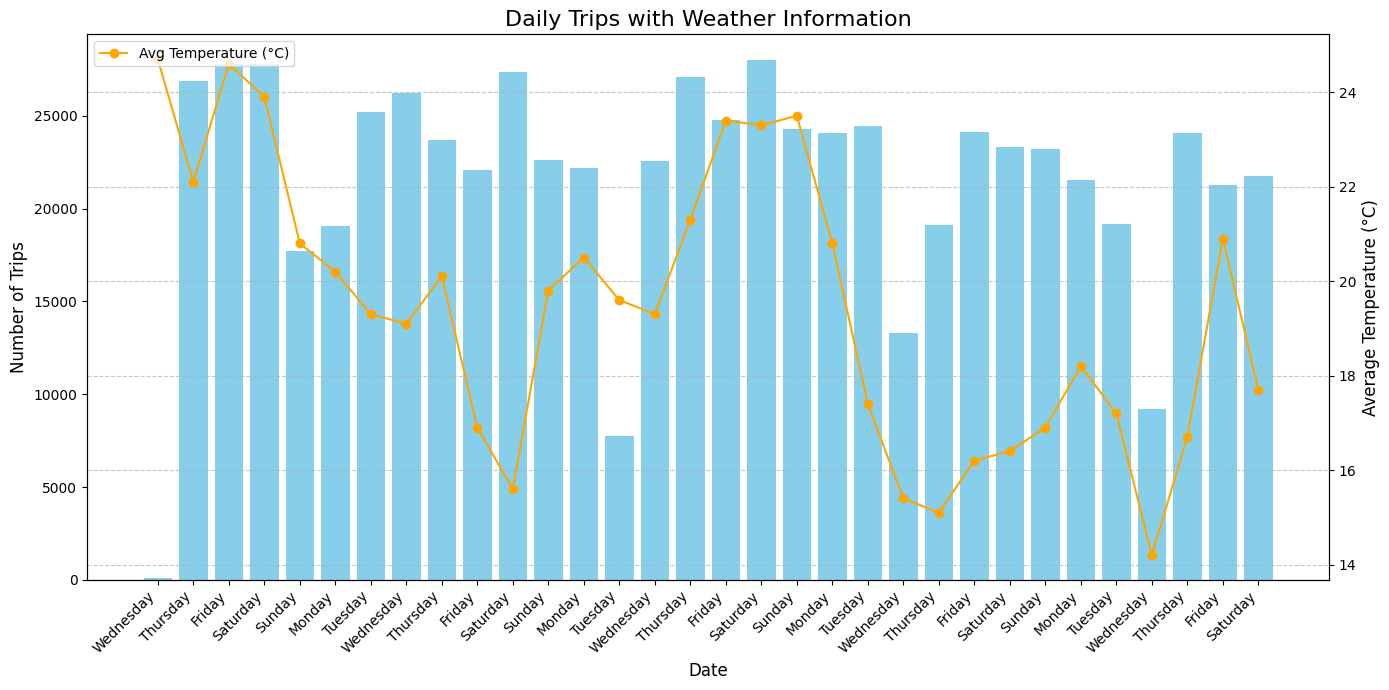

In [28]:
# Plot the merged data with weather information, include daily trips, rainfall, and temperature
plt.figure(figsize=(14, 7))
plt.bar(merged_data['Date'], merged_data[0], color='skyblue', label='Daily Trips')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Daily Trips with Weather Information', fontsize=16)
plt.xticks(merged_data['Date'], labels=merged_data['DayOfWeek'], rotation=45, ha='right')
plt.twinx()
plt.plot(merged_data['Date'], merged_data['Average Temperature (°C)'], color='orange', marker='o', label='Avg Temperature (°C)')
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

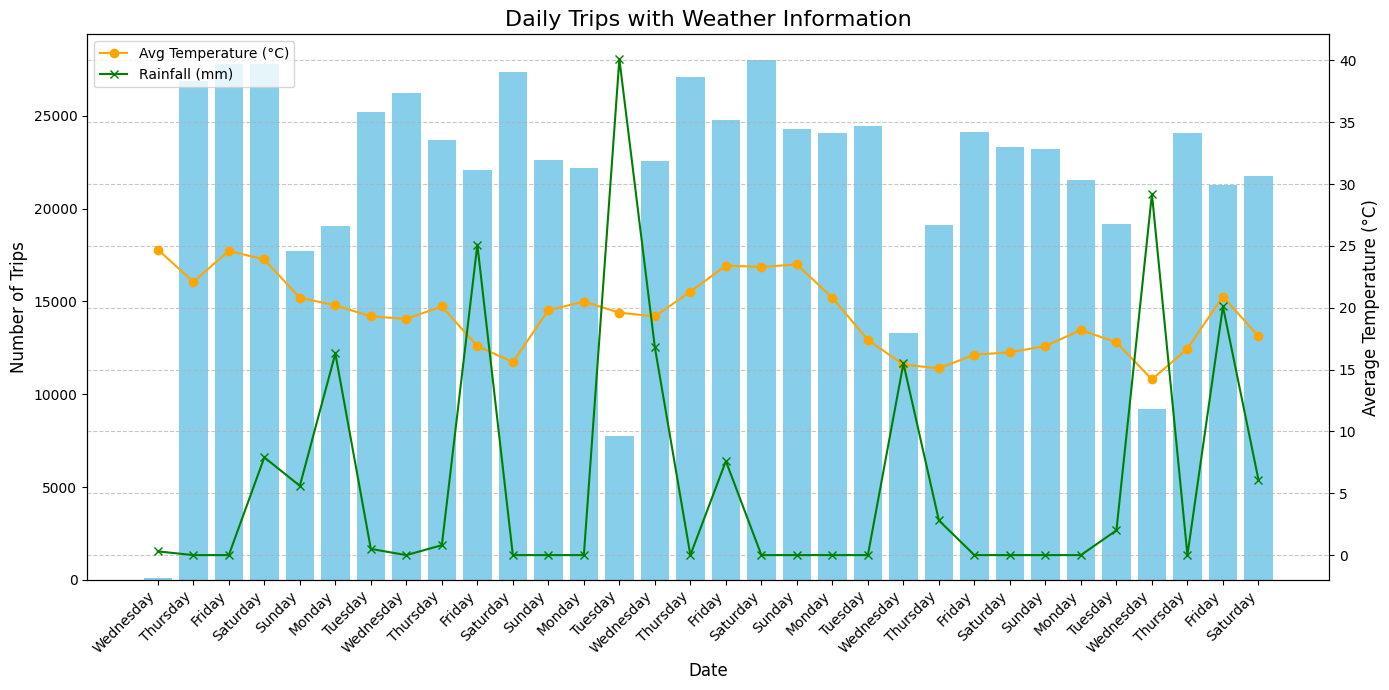

In [29]:
# Plot the merged data with weather information, including daily trips, temperature, and rainfall
plt.figure(figsize=(14, 7))

# Plot daily trips as a bar chart
plt.bar(merged_data['Date'], merged_data[0], color='skyblue', label='Daily Trips')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.title('Daily Trips with Weather Information', fontsize=16)
plt.xticks(merged_data['Date'], labels=merged_data['DayOfWeek'], rotation=45, ha='right')

# Add temperature as a line plot
plt.twinx()
plt.plot(merged_data['Date'], merged_data['Average Temperature (°C)'], color='orange', marker='o', label='Avg Temperature (°C)')
plt.ylabel('Average Temperature (°C)', fontsize=12)

# Add rainfall as another line plot
plt.plot(merged_data['Date'], merged_data['Precipitation (mm)'], color='green', marker='x', label='Rainfall (mm)')

# Add grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [37]:
# One-hot encode the 'DayOfWeek' column
merged_data_encoded = pd.get_dummies(merged_data, columns=['DayOfWeek'], prefix='Day')

# Display the first few rows of the updated dataset
print(merged_data_encoded.head())

        Date      0  Average Temperature (°C)  Precipitation (mm)  Day_Friday  \
0 2025-04-30    122                      24.7                 0.3       False   
1 2025-05-01  26892                      22.1                 0.0       False   
2 2025-05-02  27770                      24.6                 0.0        True   
3 2025-05-03  27796                      23.9                 7.9       False   
4 2025-05-04  17689                      20.8                 5.6       False   

   Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  Day_Tuesday  \
0       False         False       False         False        False   
1       False         False       False          True        False   
2       False         False       False         False        False   
3       False          True       False         False        False   
4       False         False        True         False        False   

   Day_Wednesday  
0           True  
1          False  
2          False  
3          False

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = merged_data_encoded[['Average Temperature (°C)', 'Precipitation (mm)', 'Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday',
                   'Day_Saturday']]
y = merged_data_encoded[0]  # Daily trips

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Display the model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 5991276.403429511
R-squared: -0.13689806167800378
Coefficients: [ -150.17176739  -281.4248765    471.25572023  -485.14195626
 -4836.67707583   813.21658381  4096.81239252  4431.45133848]
Intercept: 25382.473116646695


In [39]:
merged_data_encoded.columns

Index([                    'Date',                          0,
       'Average Temperature (°C)',       'Precipitation (mm)',
                     'Day_Friday',               'Day_Monday',
                   'Day_Saturday',               'Day_Sunday',
                   'Day_Thursday',              'Day_Tuesday',
                  'Day_Wednesday'],
      dtype='object')

In [35]:
merged_data

,Date,0,DayOfWeek,Average Temperature (°C),Precipitation (mm)
0,2025-04-30,122,Wednesday,24.7,0.3
1,2025-05-01,26892,Thursday,22.1,0.0
2,2025-05-02,27770,Friday,24.6,0.0
3,2025-05-03,27796,Saturday,23.9,7.9
4,2025-05-04,17689,Sunday,20.8,5.6
5,2025-05-05,19079,Monday,20.2,16.3
6,2025-05-06,25204,Tuesday,19.3,0.5
7,2025-05-07,26200,Wednesday,19.1,0.0
8,2025-05-08,23692,Thursday,20.1,0.8
9,2025-05-09,22102,Friday,16.9,25.1
